In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')
# display the first 5 rows
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 5)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

KeyError: 'Sales'

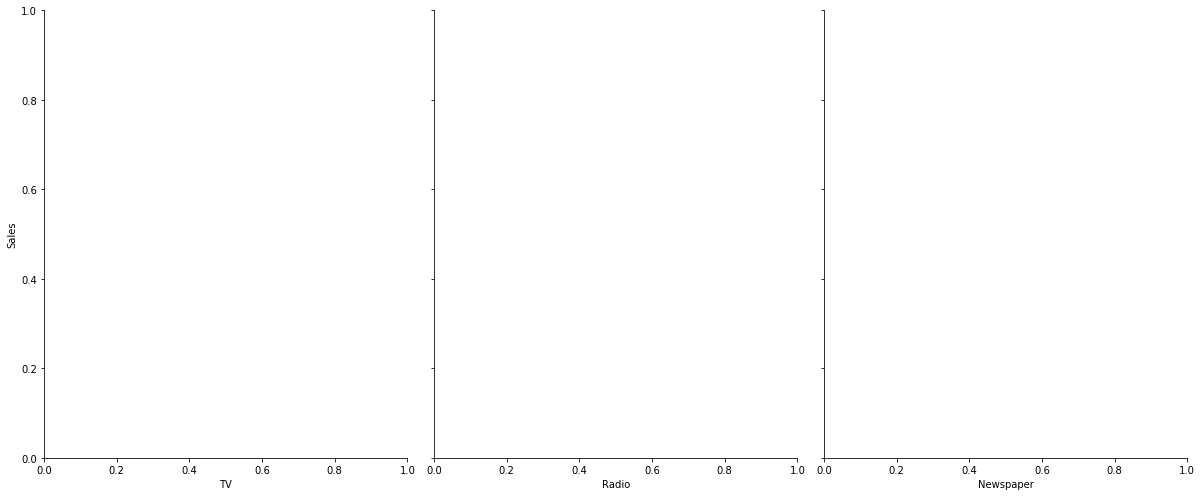

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8)
plt.show()#注意必须加上这一句，否则无法显示。

KeyError: 'Sales'

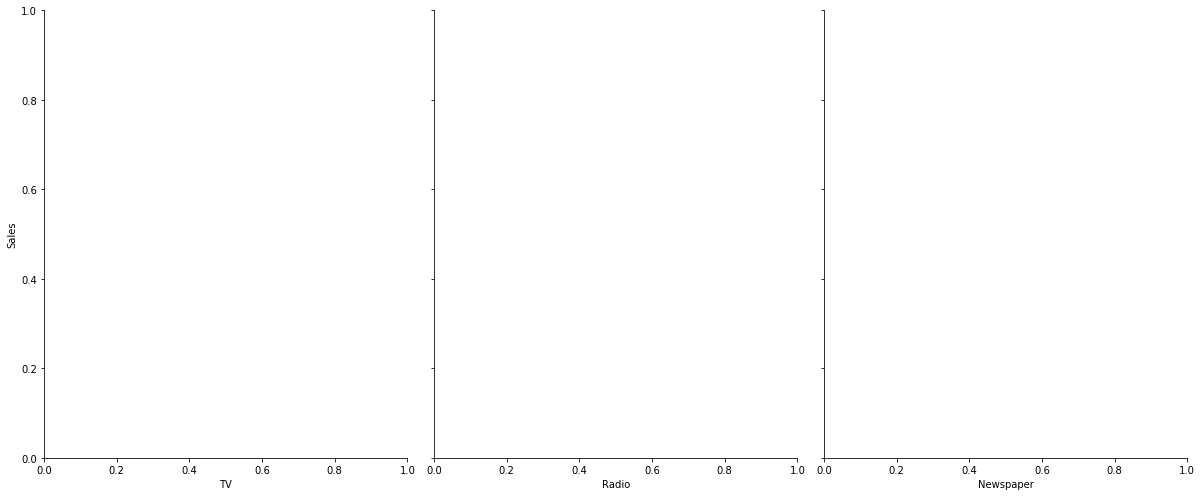

In [7]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8)

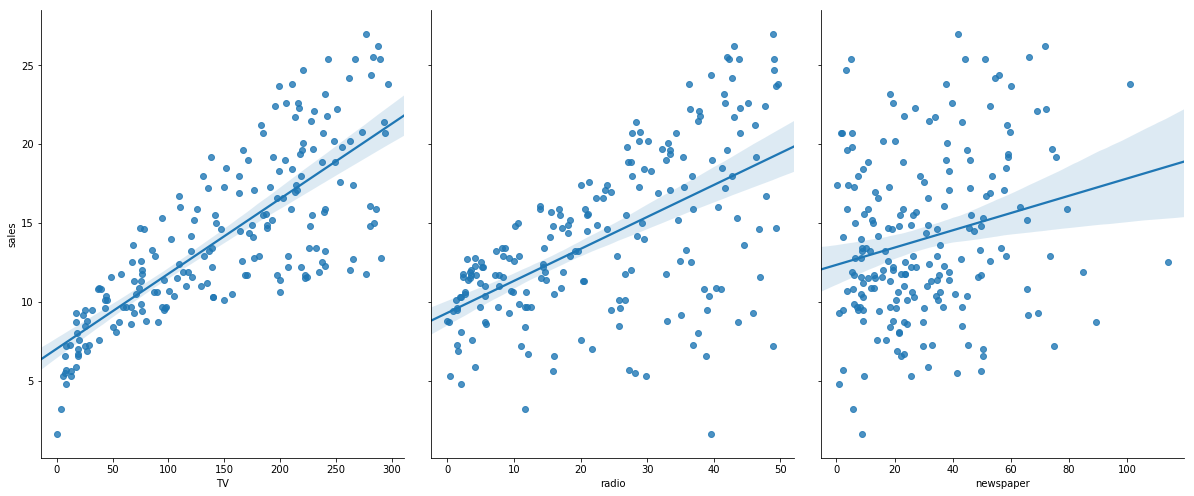

In [10]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')

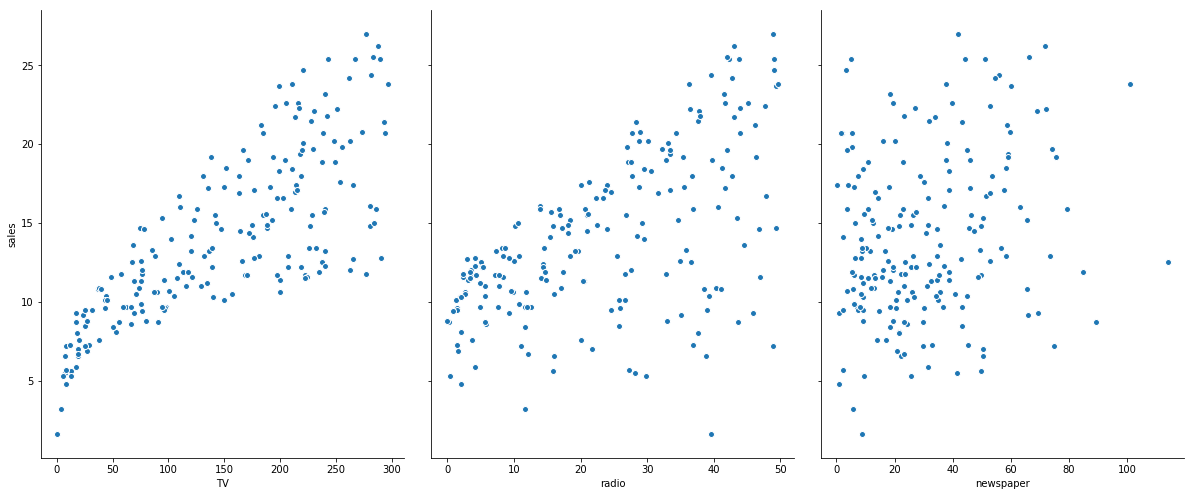

In [11]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8)
plt.show()

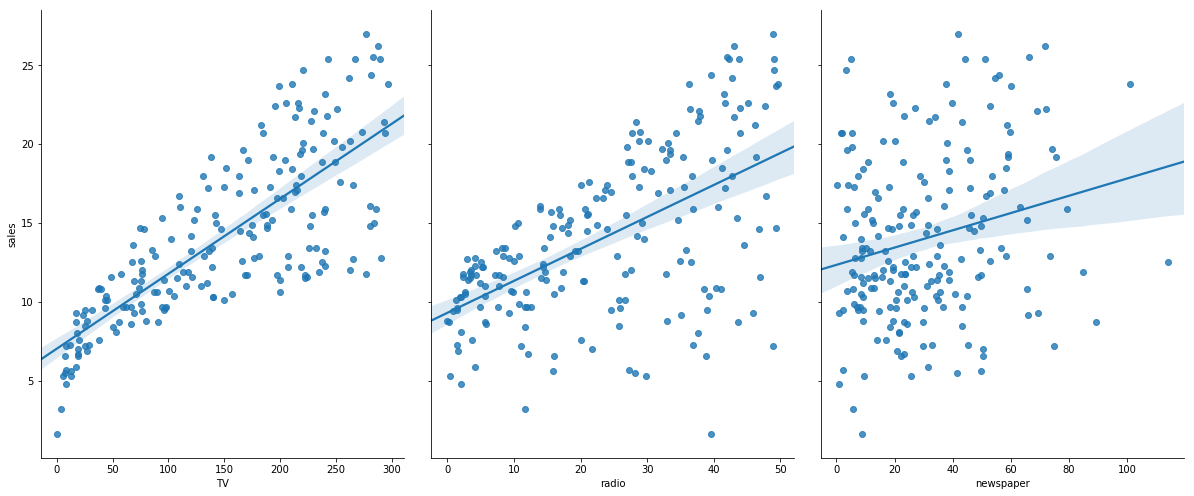

In [12]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')
plt.show()

In [13]:
#create a python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

In [14]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

In [18]:
print(X.head())

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [19]:
print (type(X))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print (X.shape)

(200, 3)


In [21]:
# select a Series from the DataFrame
y = data['sales']
# equivalent command that works if there are no spaces in the column name
y = data.sales
# print the first 5 values
print(y.head())

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [22]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [26]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [27]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [30]:
# pair the feature names with the coefficients
print (feature_cols, linreg.coef_)

['TV', 'radio', 'newspaper'] [0.04656457 0.17915812 0.00345046]


In [31]:
y_pred = linreg.predict(X_test)
print (y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [32]:
print (type(y_pred),type(y_test))
print (len(y_pred),len(y_test))
print (y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
50 50
(50,) (50,)
RMSE by hand: 1.4046514230328953


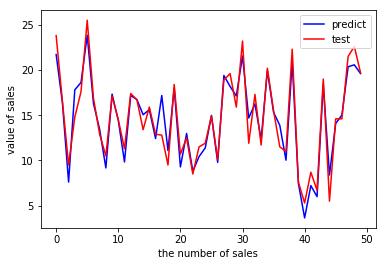

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()